# Pengenalan angka secara Realtime

Library yang diperlukan, yaitu:
- OpenCv
- NumPy
- Matplotlib
- TensorFlow
- Keras

**Pertama, masukkan seluruh library yang dibutuhkan**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils 
%matplotlib inline

**Disini, Kita menggunakan Dataset yang sudah disediakan dari Library Keras**

In [2]:
# Memasukkan Data Training dan Testing

(train_X,train_y),(test_X,test_y) = mnist.load_data()

**Setelah memuat isi Dataset Mnist, Kita lakukan pengecekan jumlah Train dan Test yang tersedia**

In [3]:
# Melihat jumlah seluruh dataset
print ("train_X : ", train_X.shape)
print ("test_X  : ", test_X.shape)

train_X :  (60000, 28, 28)
test_X  :  (10000, 28, 28)


**Melihat Satu Contoh isi Dataset Mnist**

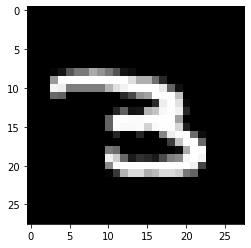

In [4]:
# Menampilkan dataset
plt.imshow(train_X[250],cmap='gray')

**Kemudian, Kita tampilkan Pembacaan Aktual dari contoh yang sudah dimuat**

In [5]:
# Menampilkan Actual Number

train_y[250]

3

**Proses dibawah ini mengubah hasil Pembacaan Aktual dari Bilangan Bulat ke dalam bentuk data list index berurutan**

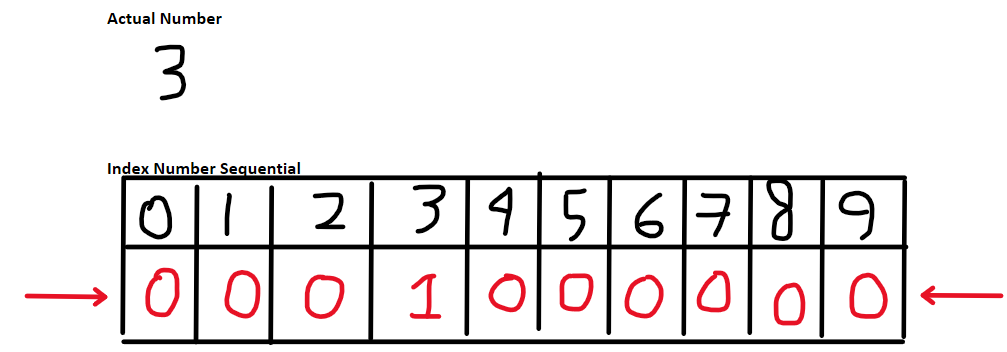

In [6]:
# Reshape ukuran dataset dan membuat kategori

train_X = train_X.reshape(-1,28,28,1)
test_X  = test_X.reshape(-1,28,28,1)
train_X = train_X.astype('float32')
test_X  = test_X.astype('float32')
train_X = train_X/255
test_X  = test_X/255
train_y = np_utils.to_categorical(train_y)
test_y  = np_utils.to_categorical(test_y)

In [7]:
train_y[250]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

**Setelah dirasa pengecekan Dataset Mnist Cukup, Buat Model CNN yang diinginkan. Dengan Rincian Sebagai Berikut ini:**

Membuat Model CNN
1. Input Layer (28,28,1)
2. Convolution Layer 1
3. Max Pooling 2D Layer 1
4. Convolution Layer 2
5. Max Pooling 2D Layer 2
6. Dropout (0.25)
7. Flatten Step 1
8. Dense Step 1
9. Dropout (0.5)
10. Dense Step 2

In [8]:
# Membuat Model CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(28,28,1), padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(0.01), metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

**Apabila dirasa Model CNN sudah Sesuai, maka memulai proses training data dengan epochs sebanyak 10 kali. Pada akhir proses training akan menampilkan hasil presentase Test Loss dan Test Accuracy**

In [9]:
# Memulai training Data
batch_size=32
epochs=10
plotting_data = model.fit(train_X,
                          train_y,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(test_X,test_y))
loss,accuracy = model.evaluate(test_X,test_y,verbose=0)
print('Test loss ---> ',str(round(loss*100,2)) +str('%'))
print('Test accuracy ---> ',str(round(accuracy*100,2)) +str('%'))

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.7439 - accuracy: 0.7575 - val_loss: 0.1801 - val_accuracy: 0.9470
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2565 - accuracy: 0.9234 - val_loss: 0.1159 - val_accuracy: 0.9651
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1899 - accuracy: 0.9419 - val_loss: 0.0855 - val_accuracy: 0.9730
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1574 - accuracy: 0.9525 - val_loss: 0.0743 - val_accuracy: 0.9769
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1351 - accuracy: 0.9596 - val_loss: 0.0626 - val_accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1223 - accuracy: 0.9633 - val_loss: 0.0567 - val_accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1097 - accuracy: 0.9666 - val_loss: 0.0532 -

**Menampilkan hasil proses Training setiap Epoch**

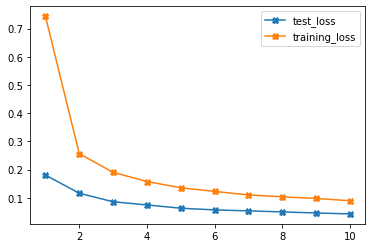

In [10]:
plotting_data_dict = plotting_data.history
test_loss = plotting_data_dict['val_loss']
training_loss = plotting_data_dict['loss']
test_accuracy = plotting_data_dict['val_accuracy']
training_accuracy = plotting_data_dict['accuracy']
epochs = range(1,len(test_loss)+1)
plt.plot(epochs,test_loss,marker='X',label='test_loss')
plt.plot(epochs,training_loss,marker='X',label='training_loss')
plt.legend()

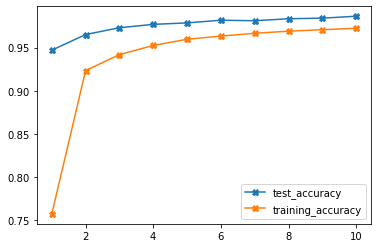

In [11]:
plt.plot(epochs,test_accuracy,marker='X',label='test_accuracy')
plt.plot(epochs,training_accuracy,marker='X',label='training_accuracy')
plt.legend()

**Mengoptimalkan Proses Model Prediksi**

In [12]:
predictions = model.predict(test_X)
print(predictions[0])

313/313 [==============================] - 1s 4ms/step
[1.4200584e-10 1.7537371e-08 4.8510634e-07 8.6653000e-07 6.0356442e-11
 1.3514601e-09 2.8238333e-13 9.9999690e-01 8.6658242e-10 1.8410180e-06]


In [13]:
predictions = np.argmax(predictions, axis=1)
print(predictions[0])

7


**Menampilkan Beberapa Sample Dataset Mnist terhadap Hasil Training untuk memulai proses deteksi angka**

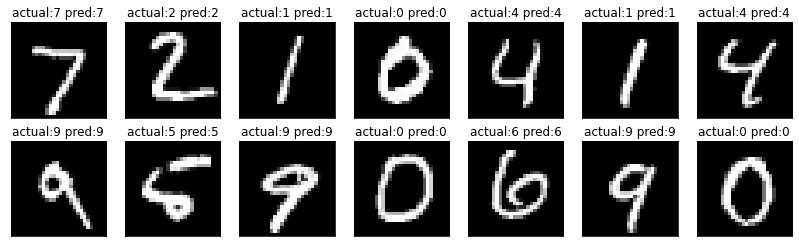

In [14]:
# Menampilkan dataset aktual dan prediksi

fig, axes = plt.subplots(nrows=2, ncols=7, sharex=False,
                        sharey=True, figsize=(14,4))
index = 0
for i in range(2):
    for j in range(7):
        axes[i,j].set_title('actual:{} pred:{}'.format(np.argmax(test_y[index]), predictions[index]))       
        axes[i,j].imshow(test_X[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

**Proses training memakan waktu yang lumayan lama. Maka perlu menyimpan hasil akhir Training dalam bentuk format h5. File format h5 akan muncul didalam satu folder yang sama**

In [15]:
# Menyimpan hasil training ke dalam format h5
model.save('MNIST-CNN.h5')
print('Model Saved !!!')

Model Saved !!!
